# 8. ML Introduction Exercise ( 40 points + 3 extra points)

### Objective

Use the fish dataset to predict the weight of the fish based on various features.
in data/Fish.csv



#### Features:

- **Species**: The species name of the fish.

- **Length1**: Vertical length in cm.

- **Length2**: Diagonal length in cm.

- **Length3**: Cross length in cm.

- **Height**: Height in cm.

- **Width**: Diagonal width in cm.

- **Weight**: Weight of the fish in grams (g).



### Data Preparation

- Clean the dataset if necessary before analysis. 

In [2]:
# data preparation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
data = pd.read_csv('data/Fish.csv')

# Display the first few rows of the dataset
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
# delete rows with missing values
data = data.dropna()

# delete duplicate rows
data = data.drop_duplicates()

# check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
# check the species names
data['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [5]:
data.describe()  # check for outliers and anomalies

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
# there was an entry with Weight 0.0, which is not possible
# show rows with weight 0
data[data['Weight'] == 0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [7]:
# it is only one row, we can remove it
data = data[data['Weight'] > 0]

In [8]:
# show rows with the 10 highest weights
data.nlargest(10, 'Weight')

,Species,Weight,Length1,Length2,Length3,Height,Width
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
123,Perch,1100.0,39.0,42.0,44.6,12.8002,6.8684
125,Perch,1100.0,40.1,43.0,45.5,12.5125,7.4165
121,Perch,1015.0,37.0,40.0,42.4,12.3808,7.4624
29,Bream,1000.0,33.5,37.0,42.6,18.9570,6.6030
60,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
124,Perch,1000.0,39.8,43.0,45.2,11.9328,7.2772


The fishes with the highest weights are all from the "Pike" species so that seems to be a valid data.
No other anomalies were found, so we can proceed with the tasks now.

### Task 1

1. Split the dataset randomly into training (70%) and testing (30%) sets. 

In [9]:
# Split the dataset into features (X) and target (y).
# As said in the task, we want to predict the weight of the fish based on various features,
# so we drop the Weight column from the features and set it as the target.
X = data.drop(columns='Weight')
y = data['Weight']

# The species column is categorical, with the species names as the values. These can't be directly used in the models.
# pd.get_dummies converts these categorical values into binary columns which indicate the species.
X = pd.get_dummies(X)  # todo check if drop_first=True is better in each model, as it doesn't lead to multicollinearity in linear regression

# show X with the new columns
X.head()

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False


In [10]:
# Split the dataset into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  # random_state for reproducibility  , random_state=5

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 110
Testing set size: 48


2. Apply the following models:

   - Linear Regression 

   - Random Forest 

3. Calculate RMSE (Root Mean Squared Error) and R2
 (Coefficient of Determination) on the test set. 

In [11]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100)  # , random_state=7
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate RMSE and R2 for Linear Regression
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Calculate RMSE and R2 for Random Forest
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print(f"Linear Regression: RMSE = {rmse_lr}, R2 = {r2_lr}")
print(f"Random Forest: RMSE = {rmse_rf}, R2 = {r2_rf}")

Linear Regression: RMSE = 74.19421033726692, R2 = 0.9448234766406307
Random Forest: RMSE = 45.19096351986938, R2 = 0.9795300161206772


4. Visualize the predictions by plotting y_pred vs y_real and compare the performance of the models.

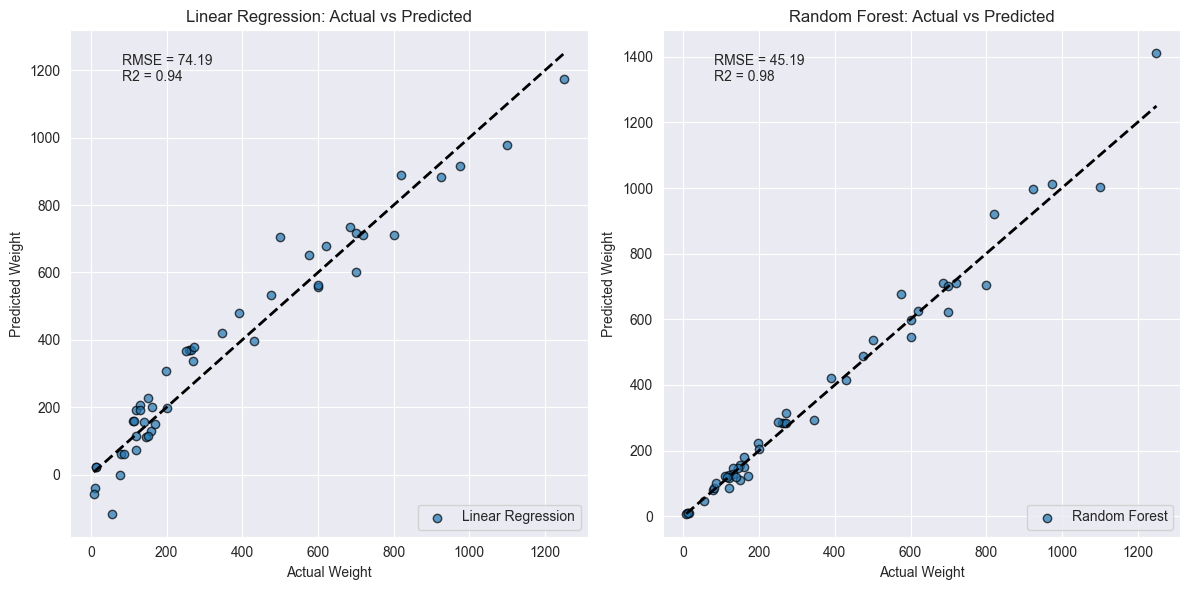

In [12]:
# Plot y_pred vs y_real for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.7, edgecolors='k', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()

# show RMSE and R2 in the plot
plt.text(0.1, 0.9, f"RMSE = {rmse_lr:.2f}\nR2 = {r2_lr:.2f}", transform=plt.gca().transAxes)

# Plot y_pred vs y_real for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.7, edgecolors='k', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()

# show RMSE and R2 in the plot
plt.text(0.1, 0.9, f"RMSE = {rmse_rf:.2f}\nR2 = {r2_rf:.2f}", transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

### Comparison of model performance by looking at the visualization
The Linear Regression model seems to have clusters of over- and under-predictions, while the Random Forest model appears to have a more uniform spread of predictions around the diagonal line. This suggests that the Random Forest model might be better at capturing the underlying patterns in the data compared to the Linear Regression model, which i guess is due to the different species of fish in the dataset.

### 5. Provide your opinion on which metric, RMSE or R2, is more appropriate in this case.
#### RMSE (Root Mean Squared Error)
- **Definition**: Measures the average magnitude of the prediction errors.
- **Interpretation**: Lower RMSE indicates better fit; it is in the same units as the dependent variable (grams).
- **Advantage**: Directly tells us how far predictions are from actual values, making it easy to understand and useful for practical applications.

#### R² (Coefficient of Determination)
- **Definition**: Measures the proportion of variance in the dependent variable that is predictable from the independent variables.
- **Interpretation**: Ranges from 0 to 1, with higher values indicating a better fit.
- **Advantage**: Provides an overall measure of how well the model explains the variability of the target variable.

#### Conclusion
In this specific case, RMSE might be more appropriate because it directly tells us how accurate our predictions are in terms of grams, which is the unit of the target variable. It gives a clearer picture of the model's prediction error in practical terms. However, R² is also valuable for understanding the overall fit and explanatory power of the model.

Given the high values of R² for both models, it is evident that both models explain a significant portion of the variance in fish weight. However, the lower RMSE for the Random Forest model indicates that it has better predictive accuracy compared to the Linear Regression model. Thus, while both metrics are useful, RMSE provides a more practical measure of prediction accuracy for this dataset.

### Task 2

1. Change the training-test split to ensure that each species has 70% of its samples in the training set and 30% in the test set.

In [13]:
# Why Stratified Split?
# - Ensures Proportional Representation: Stratified splitting ensures that each species is proportionally represented in both the training and testing sets.
# - Improves Model Generalization: This helps the model generalize better, as it sees the same distribution of species during training as it will during testing.

from sklearn.model_selection import StratifiedShuffleSplit

# Ensure each species has 70% of its samples in the training set
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3)  # , random_state=5
for train_index, test_index in split.split(X, data['Species']):
    X_train_strat = X.iloc[train_index]
    X_test_strat = X.iloc[test_index]
    y_train_strat = y.iloc[train_index]
    y_test_strat = y.iloc[test_index]

print("Training set size:", X_train_strat.shape[0])
print("Testing set size:", X_test_strat.shape[0])

Training set size: 110
Testing set size: 48


2. Repeat steps 2, 3, 4, from Task 1.

In [14]:
# train models
# Linear Regression
lr_model.fit(X_train_strat, y_train_strat)  # use model from before
y_pred_lr_strat = lr_model.predict(X_test_strat)

# Random Forest
rf_model.fit(X_train_strat, y_train_strat)
y_pred_rf_strat = rf_model.predict(X_test_strat)

# evaluate models
# Calculate RMSE and R2 for Linear Regression
rmse_lr_strat = root_mean_squared_error(y_test_strat, y_pred_lr_strat)
r2_lr_strat = r2_score(y_test_strat, y_pred_lr_strat)

# Calculate RMSE and R2 for Random Forest
rmse_rf_strat = root_mean_squared_error(y_test_strat, y_pred_rf_strat)
r2_rf_strat = r2_score(y_test_strat, y_pred_rf_strat)

# Print the results
print(f"Stratified Linear Regression: RMSE = {rmse_lr_strat}, R2 = {r2_lr_strat}")
print(f"Stratified Random Forest: RMSE = {rmse_rf_strat}, R2 = {r2_rf_strat}")

Stratified Linear Regression: RMSE = 86.7314058239422, R2 = 0.9434559173627611
Stratified Random Forest: RMSE = 53.38943660331719, R2 = 0.9785738043327102


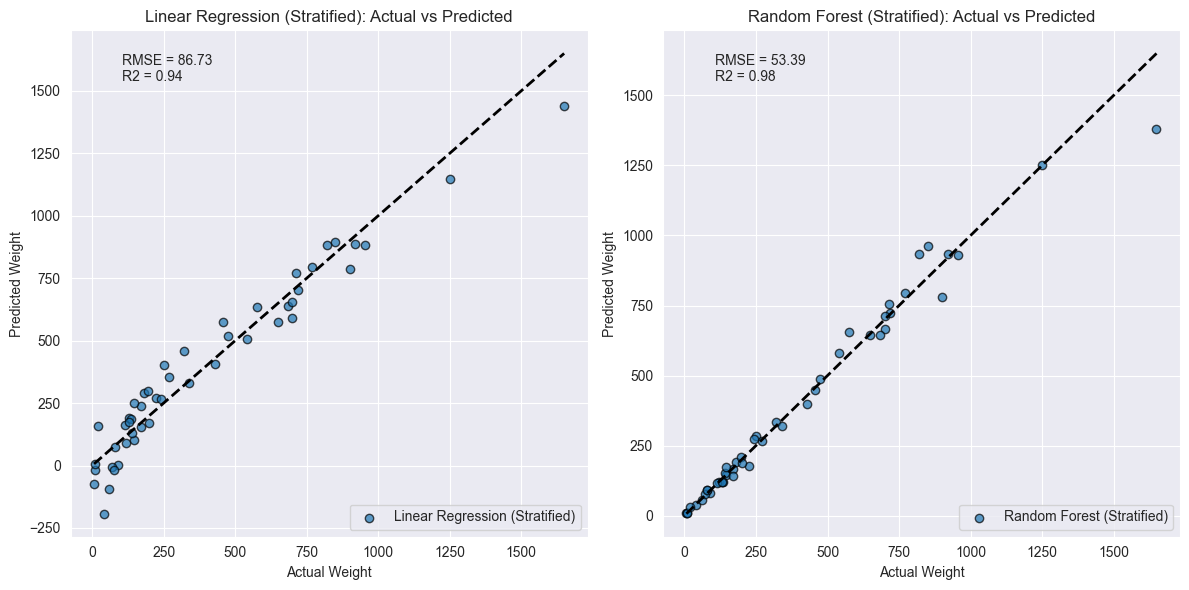

In [15]:
# Plot y_pred vs y_real for Linear Regression (Stratified)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_strat, y_pred_lr_strat, alpha=0.7, edgecolors='k', label='Linear Regression (Stratified)')
plt.plot([y_test_strat.min(), y_test_strat.max()], [y_test_strat.min(), y_test_strat.max()], 'k--', lw=2)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Linear Regression (Stratified): Actual vs Predicted')
plt.legend()
# show RMSE and R2 in the plot
plt.text(0.1, 0.9, f"RMSE = {rmse_lr_strat:.2f}\nR2 = {r2_lr_strat:.2f}", transform=plt.gca().transAxes)

# Plot y_pred vs y_real for Random Forest (Stratified)
plt.subplot(1, 2, 2)
plt.scatter(y_test_strat, y_pred_rf_strat, alpha=0.7, edgecolors='k', label='Random Forest (Stratified)')
plt.plot([y_test_strat.min(), y_test_strat.max()], [y_test_strat.min(), y_test_strat.max()], 'k--', lw=2)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Random Forest (Stratified): Actual vs Predicted')
plt.legend()
# show RMSE and R2 in the plot
plt.text(0.1, 0.9, f"RMSE = {rmse_rf_strat:.2f}\nR2 = {r2_rf_strat:.2f}", transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


### Comparison

- Compare the results obtained from Task 1 and Task 2.

In [16]:
# to get a better overview than just trying once and judging by that, we can run the models multiple times and average the results

import csv
import os

# CSV file path
results_file_path = 'data/model_results.csv'

def log_results(file_path, results):
    file_exists = os.path.isfile(file_path)
    with open(file_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        
        # Write the result row
        writer.writerow(results)

# Log results for all models
results = [
    rmse_lr, r2_lr,
    rmse_rf, r2_rf,
    rmse_lr_strat, r2_lr_strat,
    rmse_rf_strat, r2_rf_strat
]

log_results(results_file_path, results)

In [17]:
# read CSV file and display summary statistics
results_df = pd.read_csv(results_file_path)
results_df.describe()

,LR RMSE,LR R2,RF RMSE,RF R2,Strat LR RMSE,Strat LR R2,Strat RF RMSE,Strat RF R2
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,100.494039,0.914329,63.598780,0.964981,95.699139,0.927514,60.862430,0.970633
std,14.855306,0.024361,16.559023,0.017341,10.066615,0.013502,9.503633,0.006986
min,74.194210,0.855558,45.190964,0.917063,78.292769,0.892666,45.829835,0.958410
25%,89.379341,0.907602,52.361248,0.959588,89.964286,0.923641,54.625438,0.966375
50%,100.355701,0.918590,60.057023,0.971090,93.743533,0.929730,57.699083,0.970912
75%,113.293806,0.927522,72.424396,0.976715,103.769695,0.933193,69.645358,0.975059
max,122.427935,0.944823,109.707681,0.979530,114.486856,0.952407,75.709501,0.985154


## Comparison of Results

The following table shows the means of the RMSE and R² values for the different models and splits:
(! temporary values at the time of writing this md cell)

| Model                               | RMSE (Mean) | R² (Mean) |
|-------------------------------------|-------------|-----------|
| Linear Regression                   | 102         | 0.91      |
| Random Forest                       | 65          | 0.96      |
| Stratified Linear Regression        | 96          | 0.93      |
| Stratified Random Forest            | 61          | 0.97      |

The first thing to notice is that the Random Forest models perform much better in both splits. As already stated earlier, this might be due to the ability of Random Forest to capture complex relationships in the data, which Linear Regression might miss due to its linear nature. For this case, the RF model can effectively give more weight to the species of the fish while predicting the fish weight, whereas the Linear Regression model might not do so as effectively. 

In Task 2, where we stratified the split, we can see that the performance of both models improved slightly.

### Summary:

The comparison shows that while Random Forest models are inherently better suited for this dataset, applying stratified sampling further enhances model performance. This approach ensures that the variability in species distribution is accurately captured during model training, leading to better generalization and predictive accuracy.
It may not seem like a significant improvement, but the rate of improvement varies a lot depending on the dataset and used model types. Getting a feeling for the data, what model to choose and how to improve performance is a crucial part of learning machine learning.


### Extra Point

- point out which parameters can be adjusted in this exercise to improve model performance. (dont need to run analysis again) 

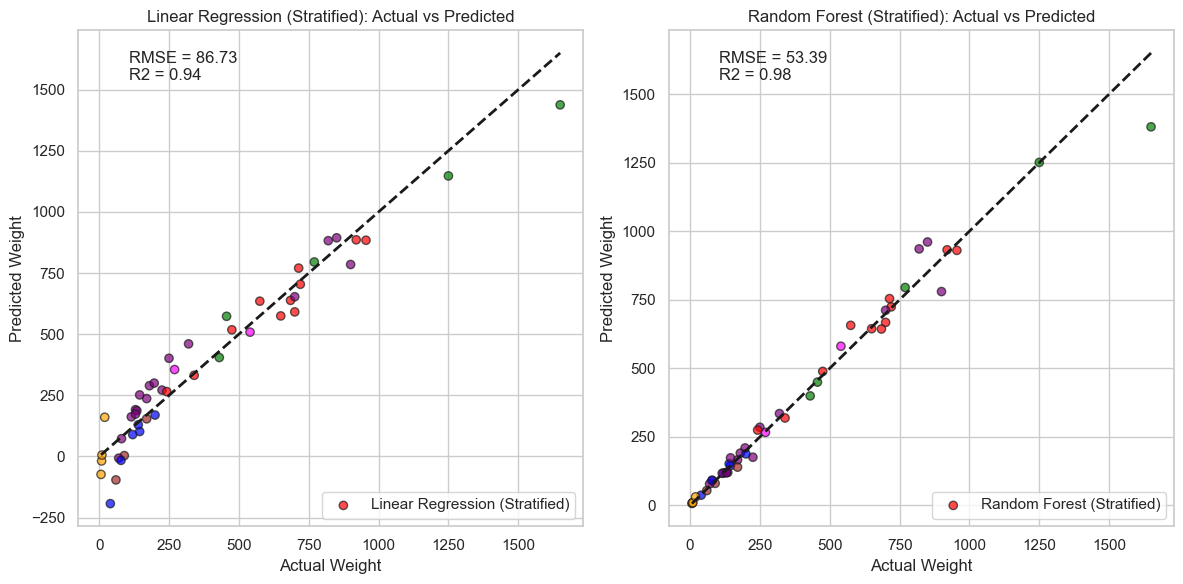

In [18]:
# plot the previous results again, but with colors for the different species, so we can see if any species is predicted better or worse

# Get the species from the original data
species_list = data['Species']

# Define a color map for each species
species_color_map = {
    'Bream': 'red',
    'Roach': 'blue',
    'Pike': 'green',
    'Perch': 'purple',
    'Smelt': 'orange',
    'Silver Bream': 'cyan',
    'Whitefish': 'magenta',
    'Parkki': 'brown'
}

# Create a list of colors corresponding to the species in the train and test sets
color_map_train_strat = [species_color_map[species] for species in data.loc[y_train_strat.index, 'Species']]
color_map_test_strat = [species_color_map[species] for species in data.loc[y_test_strat.index, 'Species']]


# Set the style for the plots
sns.set(style="whitegrid")

# Plot y_pred vs y_test for Linear Regression (Stratified)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_strat, y_pred_lr_strat, alpha=0.7, edgecolors='k', c=color_map_test_strat, label='Linear Regression (Stratified)')
plt.plot([y_test_strat.min(), y_test_strat.max()], [y_test_strat.min(), y_test_strat.max()], 'k--', lw=2)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Linear Regression (Stratified): Actual vs Predicted')
plt.legend()
# Show RMSE and R2 in the plot
plt.text(0.1, 0.9, f"RMSE = {rmse_lr_strat:.2f}\nR2 = {r2_lr_strat:.2f}", transform=plt.gca().transAxes)

# Plot y_pred vs y_test for Random Forest (Stratified)
plt.subplot(1, 2, 2)
plt.scatter(y_test_strat, y_pred_rf_strat, alpha=0.7, edgecolors='k', c=color_map_test_strat, label='Random Forest (Stratified)')
plt.plot([y_test_strat.min(), y_test_strat.max()], [y_test_strat.min(), y_test_strat.max()], 'k--', lw=2)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Random Forest (Stratified): Actual vs Predicted')
plt.legend()
# Show RMSE and R2 in the plot
plt.text(0.1, 0.9, f"RMSE = {rmse_rf_strat:.2f}\nR2 = {r2_rf_strat:.2f}", transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

## Extra point: ideas for improving model performance
1. Train-Test Split Ratio:
Experiment with different percentages for the train-test split (e.g., 80-20 instead of 70-30).

2. Random Forest Parameters:
Adjust n_estimators (number of trees)
Modify max_depth to control tree complexity
Change min_samples_split and min_samples_leaf to influence tree structure

3. Feature Selection:
Try using different combinations of the given features to see which set provides the best performance.

4. Species Encoding:
Test different methods of encoding the 'Species' categorical variable (e.g., one-hot encoding vs. label encoding).